In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse as sp
from scipy.sparse import linalg as sla
from scipy import linalg as la

In [40]:
from scipy.sparse.linalg import spsolve

In [3]:
# Q1

In [15]:
row = np.arange(0, 5, dtype=int)
col = np.arange(0, 5, dtype=int)

entries = np.arange(1, 6, dtype=int)

A = sp.csc_matrix((entries, (row, col)), shape=(5, 5))

In [16]:
A

<5x5 sparse matrix of type '<class 'numpy.intc'>'
	with 5 stored elements in Compressed Sparse Column format>

In [17]:
print(A)

  (0, 0)	1
  (1, 1)	2
  (2, 2)	3
  (3, 3)	4
  (4, 4)	5


In [18]:
sp.diags([[1, 2, 3, 4, 5], [1, 1, 1, 1]], [0, 1])

<5x5 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements (2 diagonals) in DIAgonal format>

#### Q2

In [19]:
A = (np.random.randn(20,20)-0.5)**5

In [22]:
A[np.where(np.abs(A)<0.1)] = 0

In [24]:
A.shape

(20, 20)

In [25]:
A2 = (np.random.randn(5000,5000)-0.5)**5

In [26]:
A2[np.where(np.abs(A2)<0.1)] = 0

In [30]:
A2.dtype

dtype('float64')

In [31]:
np.size(A2)*64 / 1e+6

1600.0

In [32]:
A_ = sp.csc_matrix(A2)

In [37]:
A_.data.nbytes/1e+6

115.40116

In [ ]:
# Q3

In [57]:
A = sp.random(5000, 5000, density = 0.1)

In [58]:
b = sp.random(5000, 1, density = 0.1)

In [59]:
x = spsolve(A, b)

In [60]:
mat = A@x
mat = np.reshape(mat, (5000, 1))

In [61]:
la.norm(mat-b, 2)

1.3592785514389985e-10

In [ ]:
# Q4

In [70]:
A = sp.csc_matrix(np.eye(500))

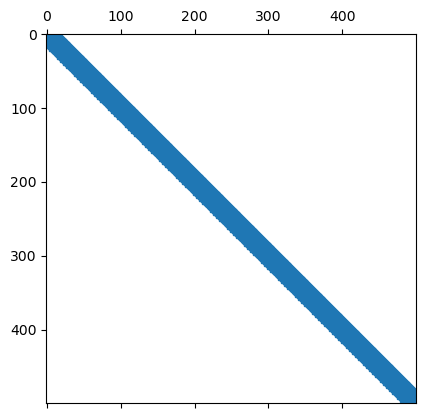

In [71]:
plt.spy(A)

In [68]:
A = sp.diags([np.tile(1, reps= (500,)), np.tile(2, reps=(499,))], [0, 1])

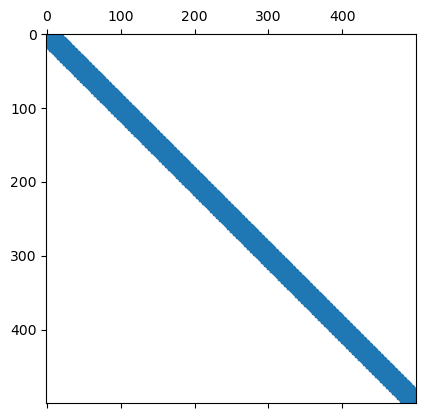

In [69]:
plt.spy(A)

In [72]:
A = sp.diags([np.tile(0.5, reps=(499,)), np.tile(1, reps= (500,)), np.tile(0.5, reps=(499,))], [-1, 0, 1])

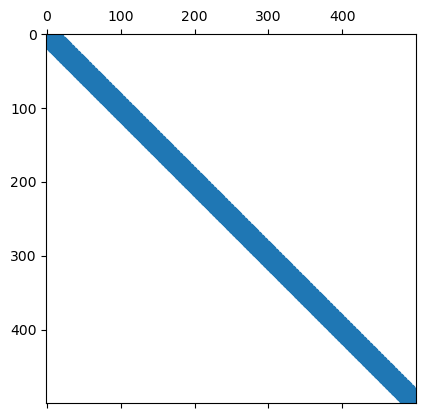

In [73]:
plt.spy(A)

In [ ]:
# Q6

In [90]:
def peig(A, tol):
    
    v = sp.random(A.shape[1], 1)
    mu = []
    
    for i in range(2):
        u = A@v
        mu.append(sla.norm(u))

        v = u/mu[-1]
        
    while abs(mu[-1] - mu[-2])> tol:
        
        u = A@v
        mu.append(sla.norm(u))

        v = u/mu[-1]
        
    return (mu[-1], v)

In [91]:
A = sp.random(1000, 1000, density = 0.1)

In [92]:
A.shape

(1000, 1000)

In [93]:
peig(A, 0.01)

(50.04232547494159,
 <1000x1 sparse matrix of type '<class 'numpy.float64'>'
 	with 1000 stored elements in Compressed Sparse Row format>)

In [ ]:
# Q7